<a href="https://www.kaggle.com/code/lucasibarra/shopping-trends-eda?scriptVersionId=215603825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns #for boxplot

# Input data files are available in the read-only "../input/" directoryx
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv


In [2]:
data = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


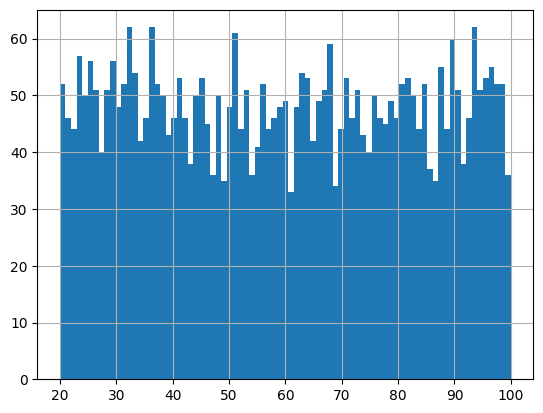

In [6]:
data['Purchase Amount (USD)'].hist(bins=81)
plt.show()

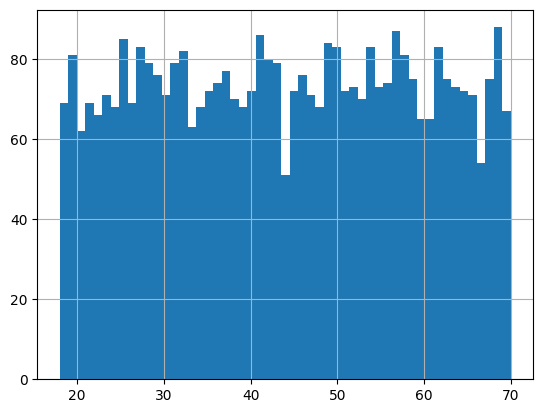

In [7]:
data['Age'].hist(bins=53)
plt.show()

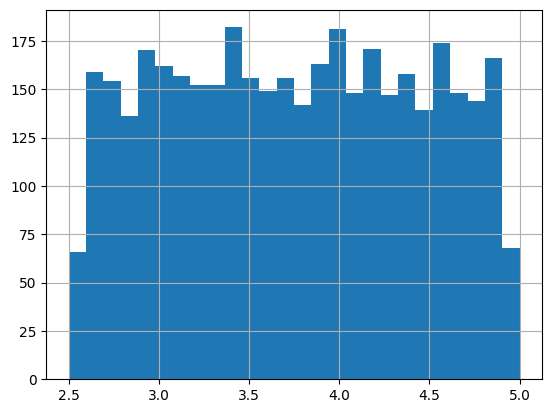

In [8]:
data['Review Rating'].hist(bins=26)
plt.show()

In [9]:
#creating subset dataframe (number of times outerwear was bought per season)
#creates new dataframe containing the four seasons
season_categories = pd.DataFrame({'Season': data['Season'].unique()})
for i, season in season_categories['Season'].items():
    #creates a column named 'outerwear_count' which tracks the number of times a piece of outerwear was bought during each season
    for category in data['Category'].unique():
        season_categories.at[i, (category+' Count')] = ((data['Season'] == season) & (data['Category'] == category)).sum()
            
print(season_categories)

   Season  Clothing Count  Footwear Count  Outerwear Count  Accessories Count
0  Winter           448.0           140.0             80.0              303.0
1  Spring           454.0           163.0             81.0              301.0
2  Summer           408.0           160.0             75.0              312.0
3    Fall           427.0           136.0             88.0              324.0


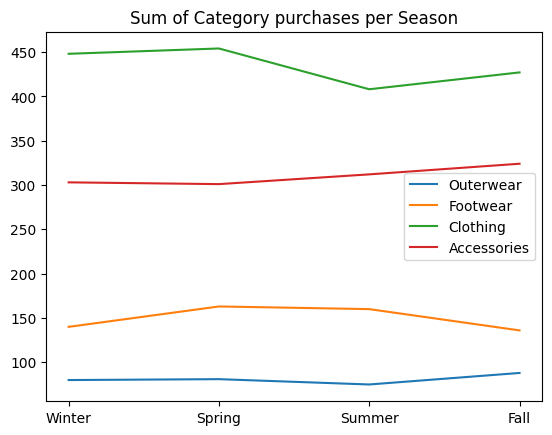

In [10]:
#line plot of all 
plt.plot(season_categories['Season'], season_categories['Outerwear Count'], label = "Outerwear")
plt.plot(season_categories['Season'], season_categories['Footwear Count'], label = 'Footwear')
plt.plot(season_categories['Season'], season_categories['Clothing Count'], label = 'Clothing')
plt.plot(season_categories['Season'], season_categories['Accessories Count'], label = 'Accessories')

plt.legend()
plt.title("Sum of Category purchases per Season")
plt.show()


In [11]:
for i, season in season_categories['Season'].items():
    #creates a column named 'outerwear_count' which tracks the number of times a piece of outerwear was bought during each season
    for category in data['Category'].unique():
        season_categories.at[i, ('Dollars '+category)] = data[(data['Season'] == season) & (data['Category'] == category)]['Purchase Amount (USD)'].sum()

print(season_categories)

   Season  Clothing Count  Footwear Count  Outerwear Count  Accessories Count  \
0  Winter           448.0           140.0             80.0              303.0   
1  Spring           454.0           163.0             81.0              301.0   
2  Summer           408.0           160.0             75.0              312.0   
3    Fall           427.0           136.0             88.0              324.0   

   Dollars Clothing  Dollars Footwear  Dollars Outerwear  Dollars Accessories  
0           27274.0            8480.0             4562.0              18291.0  
1           27692.0            9555.0             4425.0              17007.0  
2           23078.0            9393.0             4278.0              19028.0  
3           26220.0            8665.0             5259.0              19874.0  


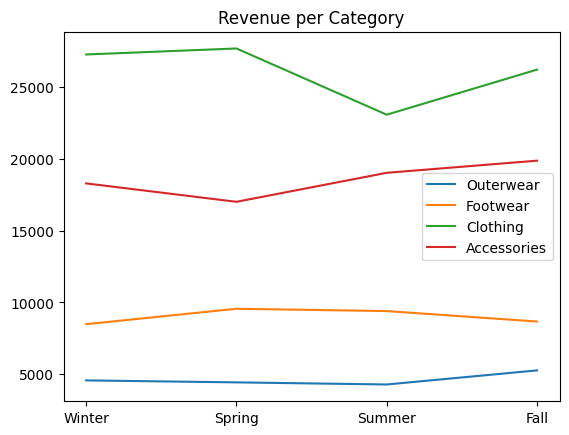

In [12]:
plt.plot(season_categories['Season'], season_categories['Dollars Outerwear'], label = "Outerwear")
plt.plot(season_categories['Season'], season_categories['Dollars Footwear'], label = 'Footwear')
plt.plot(season_categories['Season'], season_categories['Dollars Clothing'], label = 'Clothing')
plt.plot(season_categories['Season'], season_categories['Dollars Accessories'], label = 'Accessories')

plt.legend()
plt.title("Revenue per Category")
plt.show()

In [13]:
category_revenue = data.groupby('Category', as_index=False)['Purchase Amount (USD)'].sum()

total_revenue = data['Purchase Amount (USD)'].sum()
category_revenue['Percent of Total Revenue'] = (category_revenue['Purchase Amount (USD)'] / total_revenue) * 100
print(category_revenue)

      Category  Purchase Amount (USD)  Percent of Total Revenue
0  Accessories                  74200                 31.834427
1     Clothing                 104264                 44.732947
2     Footwear                  36093                 15.485175
3    Outerwear                  18524                  7.947452


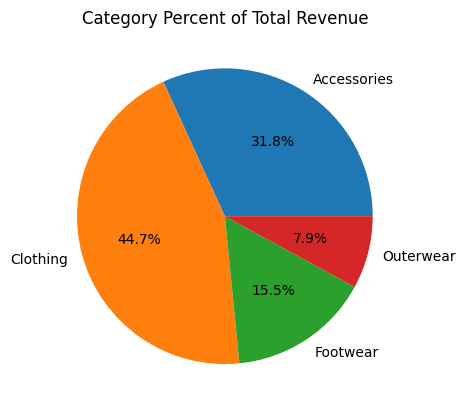

In [14]:
plt.pie(category_revenue['Percent of Total Revenue'], labels=category_revenue['Category'], autopct = '%1.1f%%')
plt.title('Category Percent of Total Revenue')
plt.show()

In [15]:
clothing_prices = data.loc[data['Category'] == 'Clothing', 'Purchase Amount (USD)'].unique()
clothing_demand = pd.DataFrame({"Price": clothing_prices})
for i, price in clothing_demand['Price'].items():
    clothing_demand.at[i, 'Quantity'] = len(data[(data['Purchase Amount (USD)'] == price) &(data['Category'] == 'Clothing')])
clothing_demand

,Price,Quantity
0,53,24.0
1,64,27.0
2,73,25.0
3,49,10.0
4,85,22.0
...,...,...
76,58,18.0
77,99,20.0
78,97,27.0
79,75,17.0


0.004923008705849559


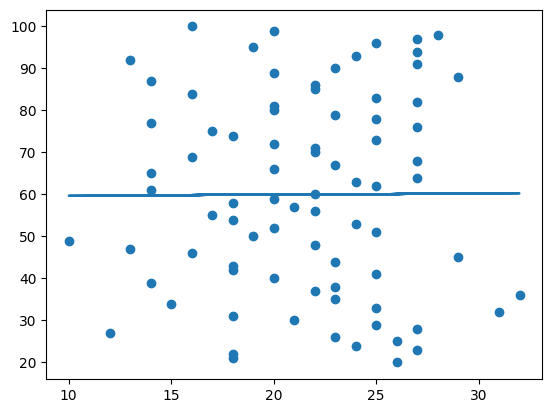

In [16]:
slope, intercept, r, p, std_err = stats.linregress(clothing_demand['Quantity'], clothing_demand['Price'])
print(r)

def clothingfunc(x):
  return slope * x + intercept

clothing_model = list(map(clothingfunc, clothing_demand['Quantity']))

plt.scatter(clothing_demand['Quantity'], clothing_demand['Price'])
plt.plot(clothing_demand['Quantity'], clothing_model)
plt.show()

In [17]:
pants_prices = data.loc[data['Item Purchased'] == 'Pants', 'Purchase Amount (USD)'].unique()
pants_demand = pd.DataFrame({"Price": pants_prices})
for i, price in pants_demand['Price'].items():
    pants_demand.at[i, 'Quantity'] = len(data[(data['Purchase Amount (USD)'] == price) &(data['Item Purchased'] == 'Pants')])
pants_demand

,Price,Quantity
0,90,3.0
1,51,5.0
2,62,3.0
3,37,2.0
4,88,5.0
...,...,...
68,54,1.0
69,91,1.0
70,96,1.0
71,42,1.0


-0.115268544816367


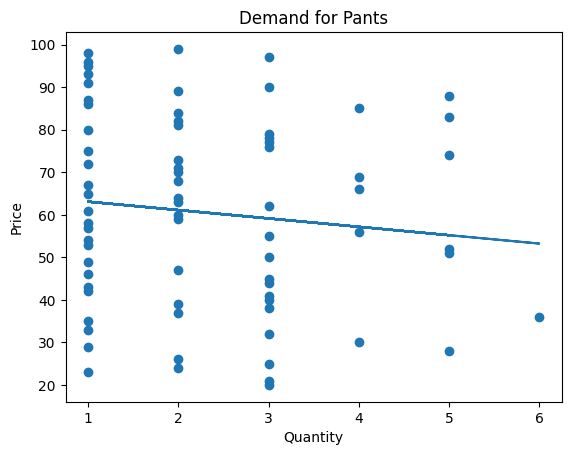

In [18]:
slope, intercept, r, p, std_err = stats.linregress(pants_demand['Quantity'], pants_demand['Price'])
print(r)

def pantsfunc(x):
  return slope * x + intercept

pants_model = list(map(pantsfunc, pants_demand['Quantity']))

plt.scatter(pants_demand['Quantity'], pants_demand['Price'])
plt.plot(pants_demand['Quantity'], pants_model)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Demand for Pants')
plt.show()

In [19]:
subscribed = data[data['Subscription Status'] == 'Yes']
subscribed['Previous Purchases'].describe()


count    1053.000000
mean       26.084520
std        14.138488
min         1.000000
25%        14.000000
50%        26.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64

<Axes: xlabel='Subscription Status', ylabel='Previous Purchases'>

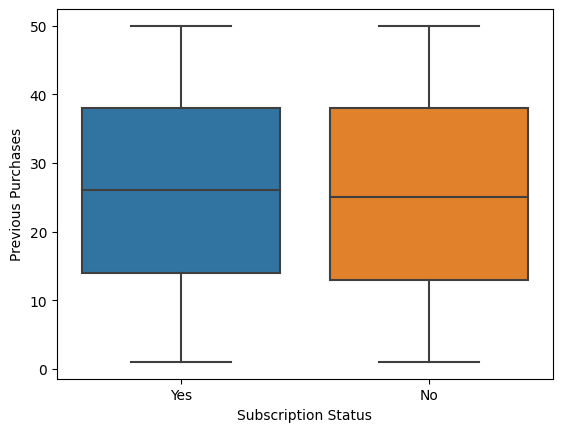

In [20]:
sns.boxplot(x='Subscription Status', y='Previous Purchases', data=data)

In [21]:
#changes subscription status to boolean values so that regression could be run
data['Subscription Status'] = data['Subscription Status'].replace({'Yes': True, 'No': False})

slope, intercept, r, p, std_err = stats.linregress(data['Subscription Status'], data['Previous Purchases'])
print(r)

0.03085943612525038


/tmp/ipykernel_17/679383554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Subscription Status'] = data['Subscription Status'].replace({'Yes': True, 'No': False})


In [22]:
clothing = data[data['Category'] == 'Clothing']
print(len(clothing))
for item in clothing['Item Purchased'].unique():
    print(item, '––', len(clothing[clothing['Item Purchased'] == item]))

1737
Blouse –– 171
Sweater –– 164
Jeans –– 124
Shirt –– 169
Shorts –– 157
Dress –– 166
Skirt –– 158
Pants –– 171
Hoodie –– 151
T-shirt –– 147
Socks –– 159
